# <center>Exercise Machine Learning. Linear Regresion</center>

## Task 1

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset "Life Expectancy" contains detailed information about this topic (**life_expectancy.csv** from Exercise-4).

**c)** Check VIF scores for each feature and determine whether multicollinearity exists or not in your model. (If it exists, fix the multicollinearity)

**d)** Create visualization for the models and evaluate the models by using the appropriate evaluation metrics.

# Objective: Prediction of Life Expectancy

### **a)** Prepare the dataset, apply necessary cleaning, manipulation for ML models.

# -

Accesing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# -

In [ ]:
# This library will be used to make a Backward Elimination for Feature Selection
!pip install mlxtend

Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import scipy.stats as stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# -

Importing and exploring data

In [ ]:
le = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/M) Python TUM/Life Expectancy Data.csv")

# Data Exploration

In [ ]:
le.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Cleaning variable names

In [ ]:
cols = list(le.columns)
new = []
for i in cols:
    new.append(i.strip().replace('  ', ' ').replace(' ', '_').lower())
le.columns = new
le.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

## Missing and weird values Detection

In [ ]:
le.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

Nearly half of the values of the column `bmi` is null so could be a good consideration drop the column

In [ ]:
le.drop(columns='bmi', inplace=True)

Could be a good approach to full the missing data by year using the mean since is a time series of values. That means that the descriptive statistics could be different and change for each year and If we make an imputation by year could be a better approach

In [ ]:
imputed_data = []
for i in list(le.year.unique()):
  year_data = le[le.year == i].copy()
  for j in list(year_data.columns)[3:]:
        year_data[j] = year_data[j].fillna(year_data[j].dropna().mean()).copy()
  imputed_data.append(year_data)

le_2 = pd.concat(imputed_data).copy()

In [ ]:
le_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  under-five_deaths                2938 non-null   int64  
 11  polio                            2938 non-null   float64
 12  total_expenditure   

## Outliers

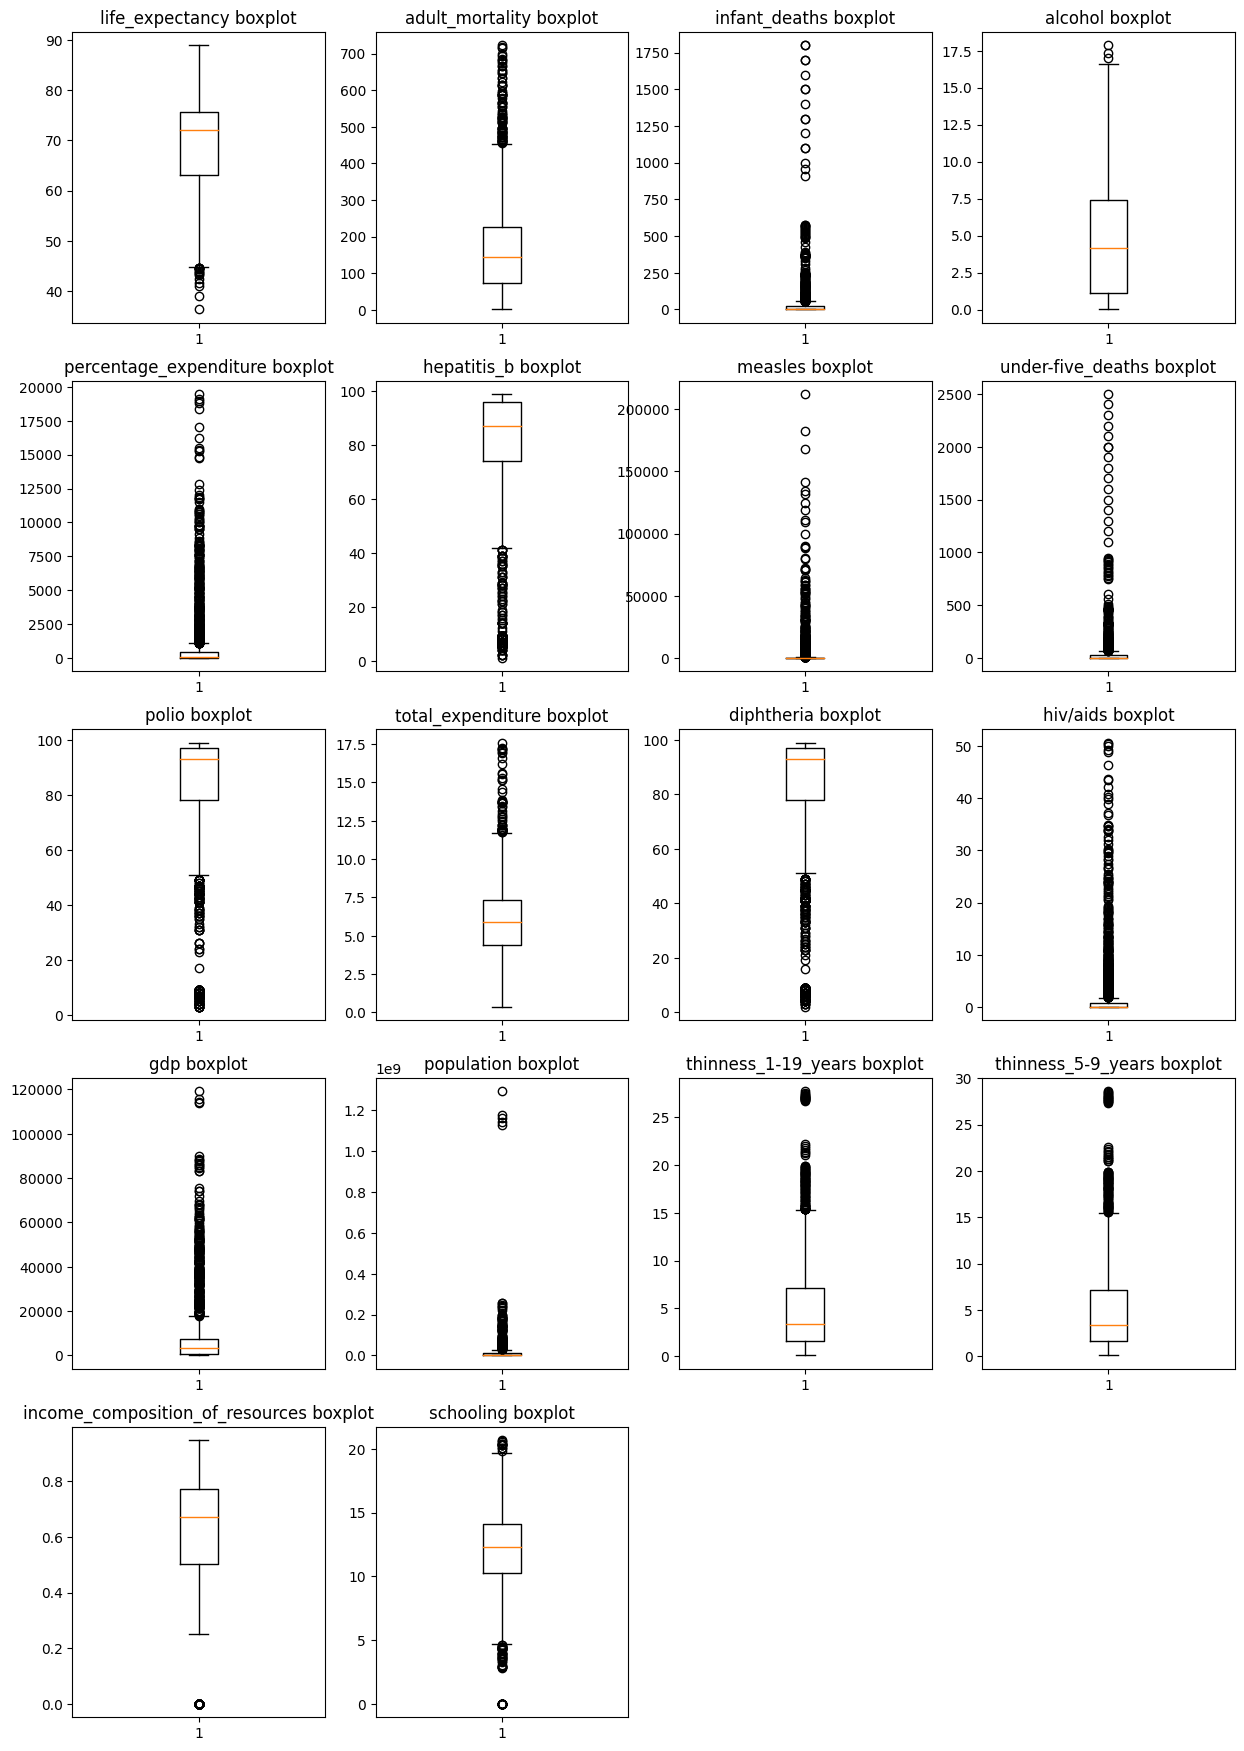

In [ ]:
# Visualization of the outliers
cont_vars = list(le_2.columns)[3:]

plt.figure(figsize=(15, 40))
i = 0
for col in cont_vars:
  i += 1
  plt.subplot(9, 4, i)
  plt.boxplot(le_2[col])
  plt.title('{} boxplot'.format(col))
plt.show()


In [ ]:
wins_dict = {}

## Dealing with the outliers

In [ ]:
# Dealing with the outliers with the winsorize function establishing a upper and lower bound
wins_data = winsorize(le_2[cont_vars[0]], limits=(0.006, 0))
wins_dict[cont_vars[0]] = wins_data

wins_data = winsorize(le_2[cont_vars[1]], limits=(0, 0.03))
wins_dict[cont_vars[1]] = wins_data

wins_data = winsorize(le_2[cont_vars[2]], limits=(0, 0.11))
wins_dict[cont_vars[2]] = wins_data

wins_data = winsorize(le_2[cont_vars[3]], limits=(0, 0.002))
wins_dict[cont_vars[3]] = wins_data

wins_data = winsorize(le_2[cont_vars[4]], limits=(0, 0.135))
wins_dict[cont_vars[4]] = wins_data

wins_data = winsorize(le_2[cont_vars[5]], limits=(0.08, 0))
wins_dict[cont_vars[5]] = wins_data

wins_data = winsorize(le_2[cont_vars[6]], limits=(0, 0.185))
wins_dict[cont_vars[6]] = wins_data

wins_data = winsorize(le_2[cont_vars[7]], limits=(0, 0.135))
wins_dict[cont_vars[7]] = wins_data

wins_data = winsorize(le_2[cont_vars[8]], limits=(0.095, 0))
wins_dict[cont_vars[8]] = wins_data

wins_data = winsorize(le_2[cont_vars[9]], limits=(0, 0.018))
wins_dict[cont_vars[9]] = wins_data

wins_data = winsorize(le_2[cont_vars[10]], limits=(0.11, 0))
wins_dict[cont_vars[10]] = wins_data

wins_data = winsorize(le_2[cont_vars[11]], limits=(0, 0.19))
wins_dict[cont_vars[11]] = wins_data

wins_data = winsorize(le_2[cont_vars[12]], limits=(0, 0.11))
wins_dict[cont_vars[12]] = wins_data

wins_data = winsorize(le_2[cont_vars[13]], limits=(0, 0.07))
wins_dict[cont_vars[13]] = wins_data

wins_data = winsorize(le_2[cont_vars[14]], limits=(0, 0.04))
wins_dict[cont_vars[14]] = wins_data

wins_data = winsorize(le_2[cont_vars[15]], limits=(0, 0.035))
wins_dict[cont_vars[15]] = wins_data

wins_data = winsorize(le_2[cont_vars[16]], limits=(0.05, 0))
wins_dict[cont_vars[16]] = wins_data

wins_data = winsorize(le_2[cont_vars[17]], limits=(0.03, 0.005))
wins_dict[cont_vars[17]] = wins_data

#plt.figure(figsize=(15,5))
#plt.subplot(121)
#plt.boxplot(le_2[cont_vars[18]])
#plt.title('original {}'.format(cont_vars[18]))
#plt.subplot(122)
#plt.boxplot(wins_data)
#plt.title('wins=({},{}) {}'.format(0, 0, cont_vars[18]))
#plt.show()

In [ ]:
#wins_dict

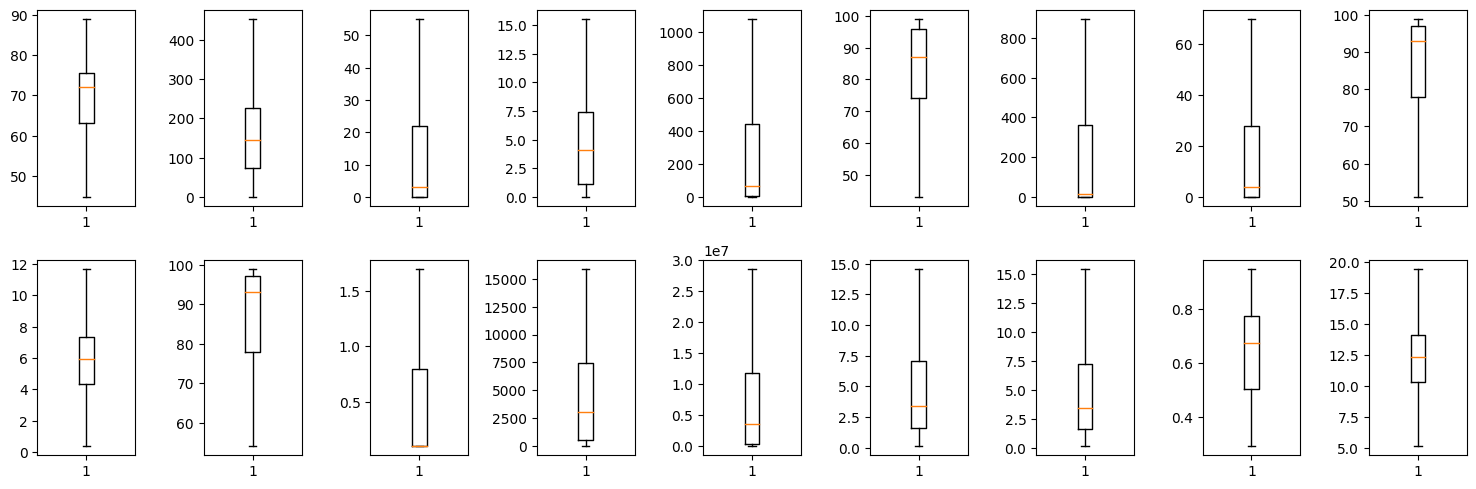

In [ ]:
# Visualizing features without outliers
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

In [ ]:
# Adding the new values without outliers to the dataset
wins_df = le_2.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

# -

In [ ]:
wins_df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.242805,161.836845,13.635126,4.641461,281.501093,82.579734,232.891423,17.965963,85.418019,5.972954,85.683315,0.508237,4937.332280,7.508368e+06,4.676870,4.720470,0.640659,12.055490
std,4.613841,9.477332,115.149676,19.108928,3.912204,384.161450,16.304056,352.001841,25.194515,15.484512,2.304114,14.752870,0.640847,5201.741446,8.646842e+06,3.855884,3.964268,0.171622,3.072809
min,2000.000000,44.800000,1.000000,0.000000,0.010000,0.000000,43.000000,0.000000,0.000000,51.000000,0.370000,54.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,5.100000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.099237,0.000000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.140000,64.912906,87.000000,17.000000,4.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,452.000000,55.000000,15.520000,1077.712092,99.000000,896.000000,70.000000,99.000000,11.700000,99.000000,1.700000,15893.865600,2.865628e+07,14.600000,15.500000,0.948000,19.500000


# Correlation Matrix

<ipython-input-110-07f64b00233d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix  = wins_df.corr()


<Axes: >

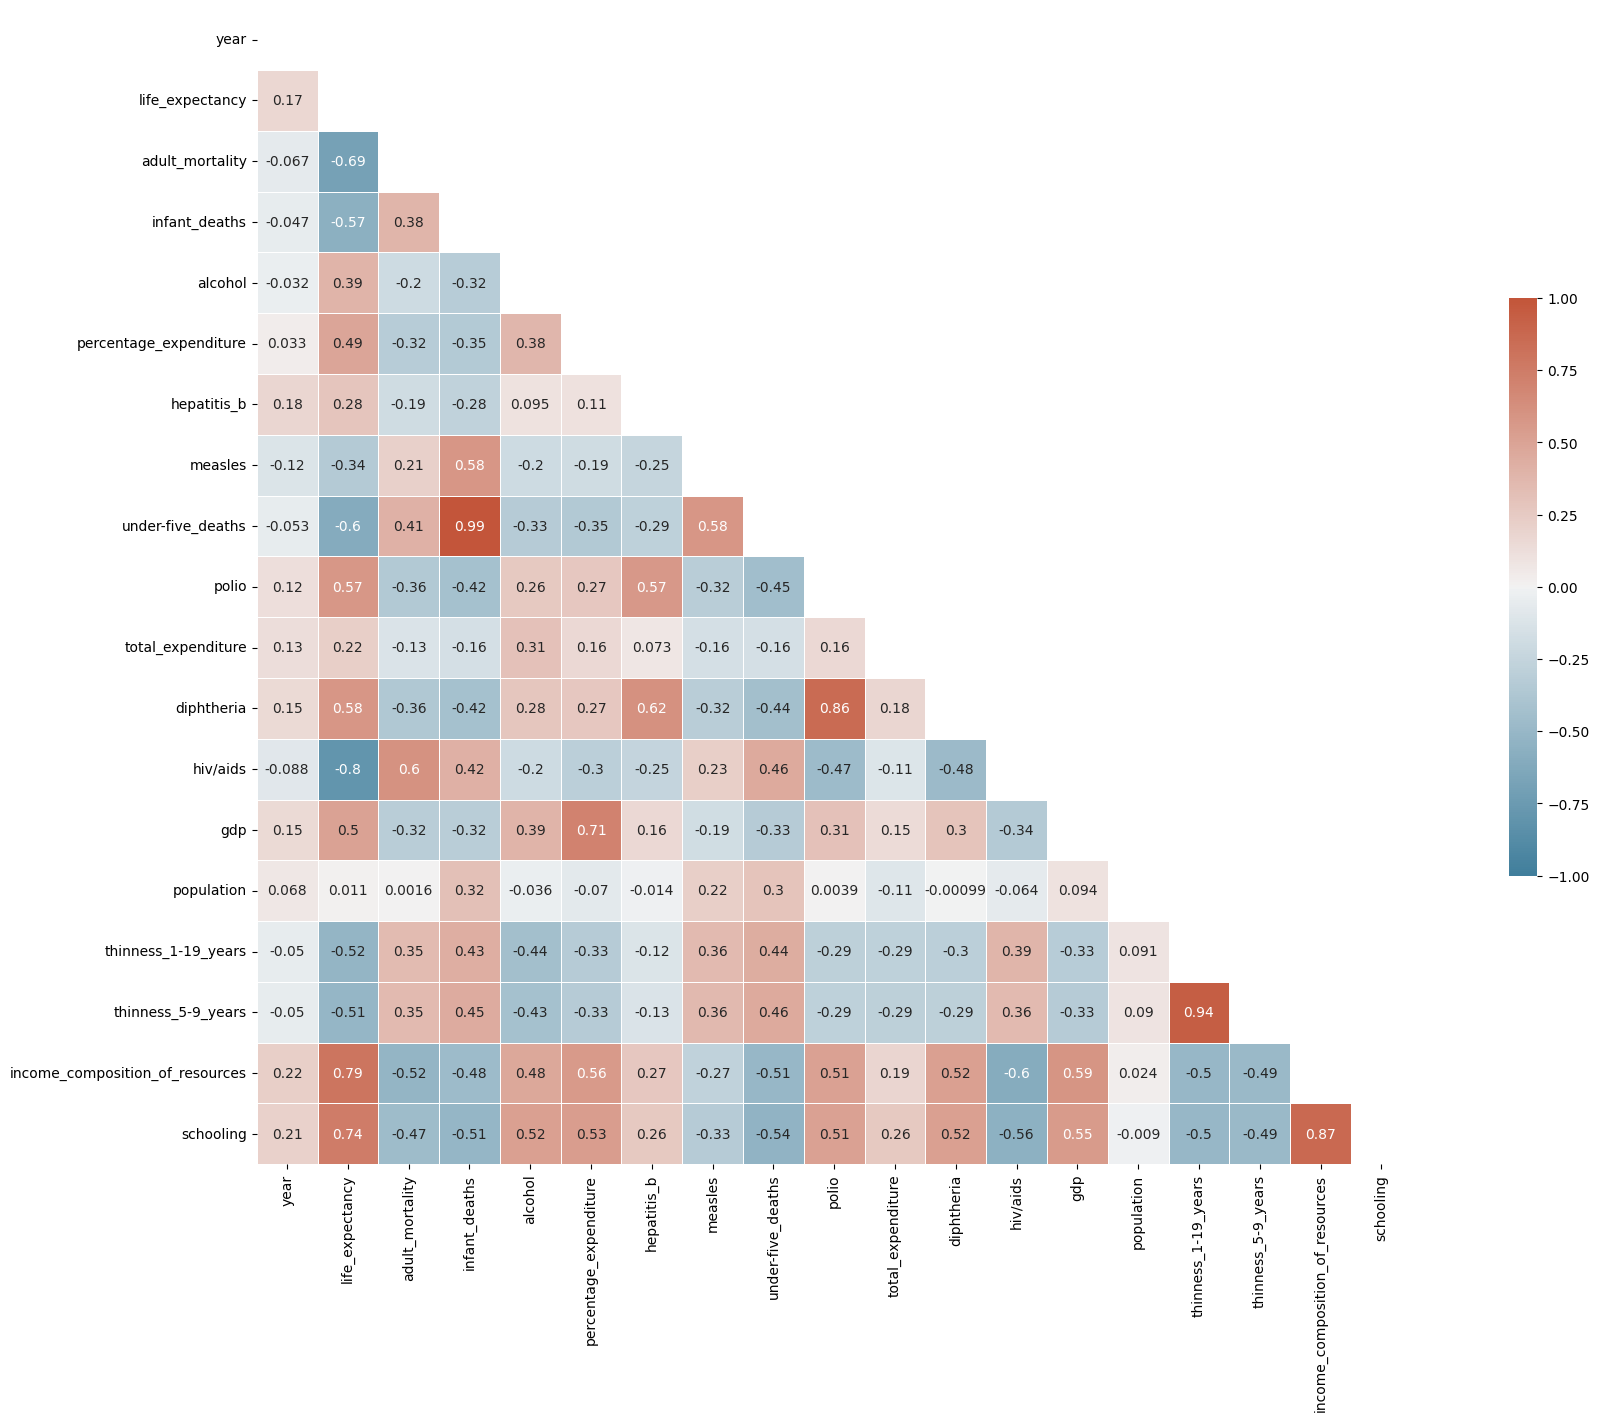

In [ ]:
matrix  = wins_df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

f, ax = plt.subplots(figsize=(25, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(matrix, mask=mask, cmap=cmap, center=0, annot=True,vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




*   Income Composition of Resources, schooling, adult mortality seems to have high positive or negative correlation
*   With population has a very low correlation
* HIV has a great correlation with the life expectancy



## Visualizing change in the Life Expectancy through the years

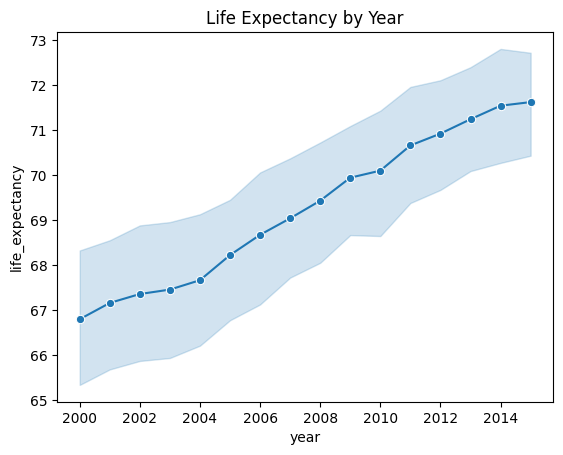

In [ ]:
sns.lineplot(data=wins_df, x = 'year', y = 'life_expectancy', marker='o')
plt.title('Life Expectancy by Year')
plt.show()

## How is the Life Expectancy between a Developed country and a Developing Country

In [ ]:
wins_df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.141822


### **b)** Build two regression models (one has multiple features) that predicts the "life expectancy" for the dataset. Determine the independent variable(s) with the methods for choosing the features (e.g. Backward elimination)

### Linnear Regression (One variable)

Variables

In [ ]:
X = wins_df[['income_composition_of_resources']]
Y = wins_df[['life_expectancy']]

Spliting between train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)


# -

In [ ]:
y_pred

array([[80.12641294],
       [74.60290608],
       [73.29814068],
       [67.42669637],
       [66.29589969],
       [73.29814068],
       [73.12417196],
       [67.3590698 ],
       [65.86097789],
       [71.12353167],
       [75.03782788],
       [78.82164754],
       [61.4682677 ],
       [71.08003949],
       [78.2562492 ],
       [72.55877362],
       [76.7340229 ],
       [79.21307716],
       [70.75623644],
       [73.4721094 ],
       [58.641276  ],
       [70.77559423],
       [67.3590698 ],
       [71.64543784],
       [81.21371744],
       [74.1244921 ],
       [54.0745971 ],
       [65.38256391],
       [75.99465584],
       [71.60194565],
       [75.51624186],
       [73.51560158],
       [71.35808777],
       [75.4292575 ],
       [72.03686746],
       [63.20795491],
       [54.55301108],
       [70.38416461],
       [70.68860987],
       [59.98953358],
       [58.11936984],
       [69.94924281],
       [69.07939921],
       [71.51496129],
       [78.12577266],
       [79

In [ ]:
y_test

,life_expectancy
2534,84.0
1461,75.0
1339,72.8
2842,72.0
1385,65.1
...,...
1325,82.1
2135,75.0
518,48.6
133,84.0


# Regression obtained from the linear regresion between Life Expectancy and Income

Text(0, 0.5, 'Life expectancy')

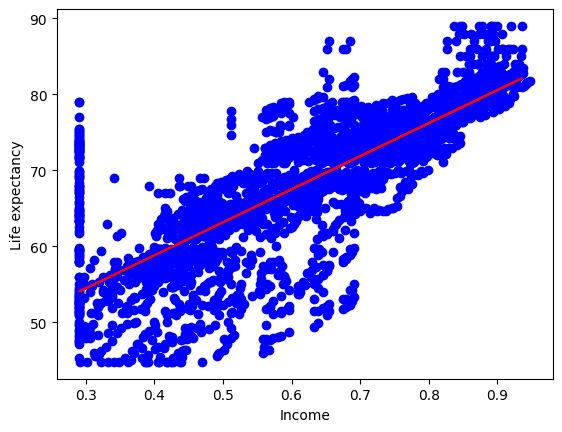

In [ ]:
plt.scatter(X,Y, color = 'blue')
plt.plot(x_test, y_pred, color = 'red')
plt.xlabel('Income')
plt.ylabel('Life expectancy')

* Blue points are the predictions
* Red line are the test values

## Evaluating the model

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

MAE: 3.9533143934811026
RMSE:  5.784392698935013
R2:  0.6353239460780539


## Multiple features Regression

In [ ]:
X = wins_df.drop(columns = ['life_expectancy', 'country', 'year', 'status'])
Y = wins_df[['life_expectancy']]

In [ ]:
#X.head(4)

In [ ]:
#Y.head(4)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

MAE: 2.7165376220369715
RMSE:  3.7176102035469243
R2:  0.8493672478056632


# Backward Elimination

In [ ]:
sfs1 = sfs(lin_reg, k_features = 2, forward = False, verbose = 1, scoring = 'neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(X,Y)

Features: 2/2

In [ ]:
fin_names = list(sfs1.k_feature_names_)
print(fin_names)

['hiv/aids', 'income_composition_of_resources']


## Training after Backward

In [ ]:
X = wins_df.drop(columns = ['life_expectancy', 'country', 'year', 'status', 'alcohol', 'infant_deaths', 'percentage_expenditure', 'hepatitis_b',
                            'measles', 'polio', 'total_expenditure', 'gdp', 'population', 'schooling', 'thinness_1-19_years'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2, random_state = 41)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

MAE: 3.038780209954718
RMSE:  4.046528367997932
R2:  0.8219504972086332


# -

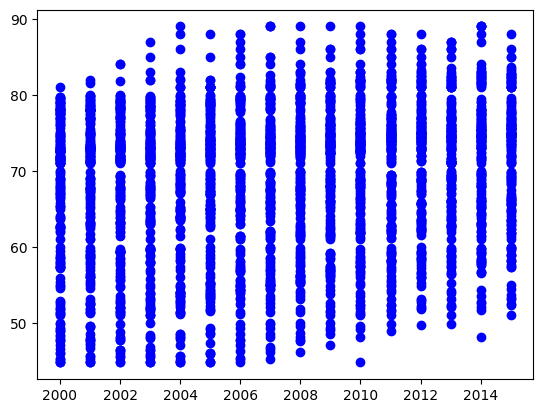

In [ ]:
plt.scatter(y= wins_df['life_expectancy'],  x = wins_df['year'], color = 'blue')
#plt.plot(y_pred, color = 'red')

# Task 2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# -

In [ ]:
hs = pd.read_csv("/content/drive/MyDrive/Mis Documentos/Curso de Python/M) Python TUM/housing.csv")

# Data Exploration

In [ ]:
hs.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
imputer=SimpleImputer(strategy="median")
housing_num=hs.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: >

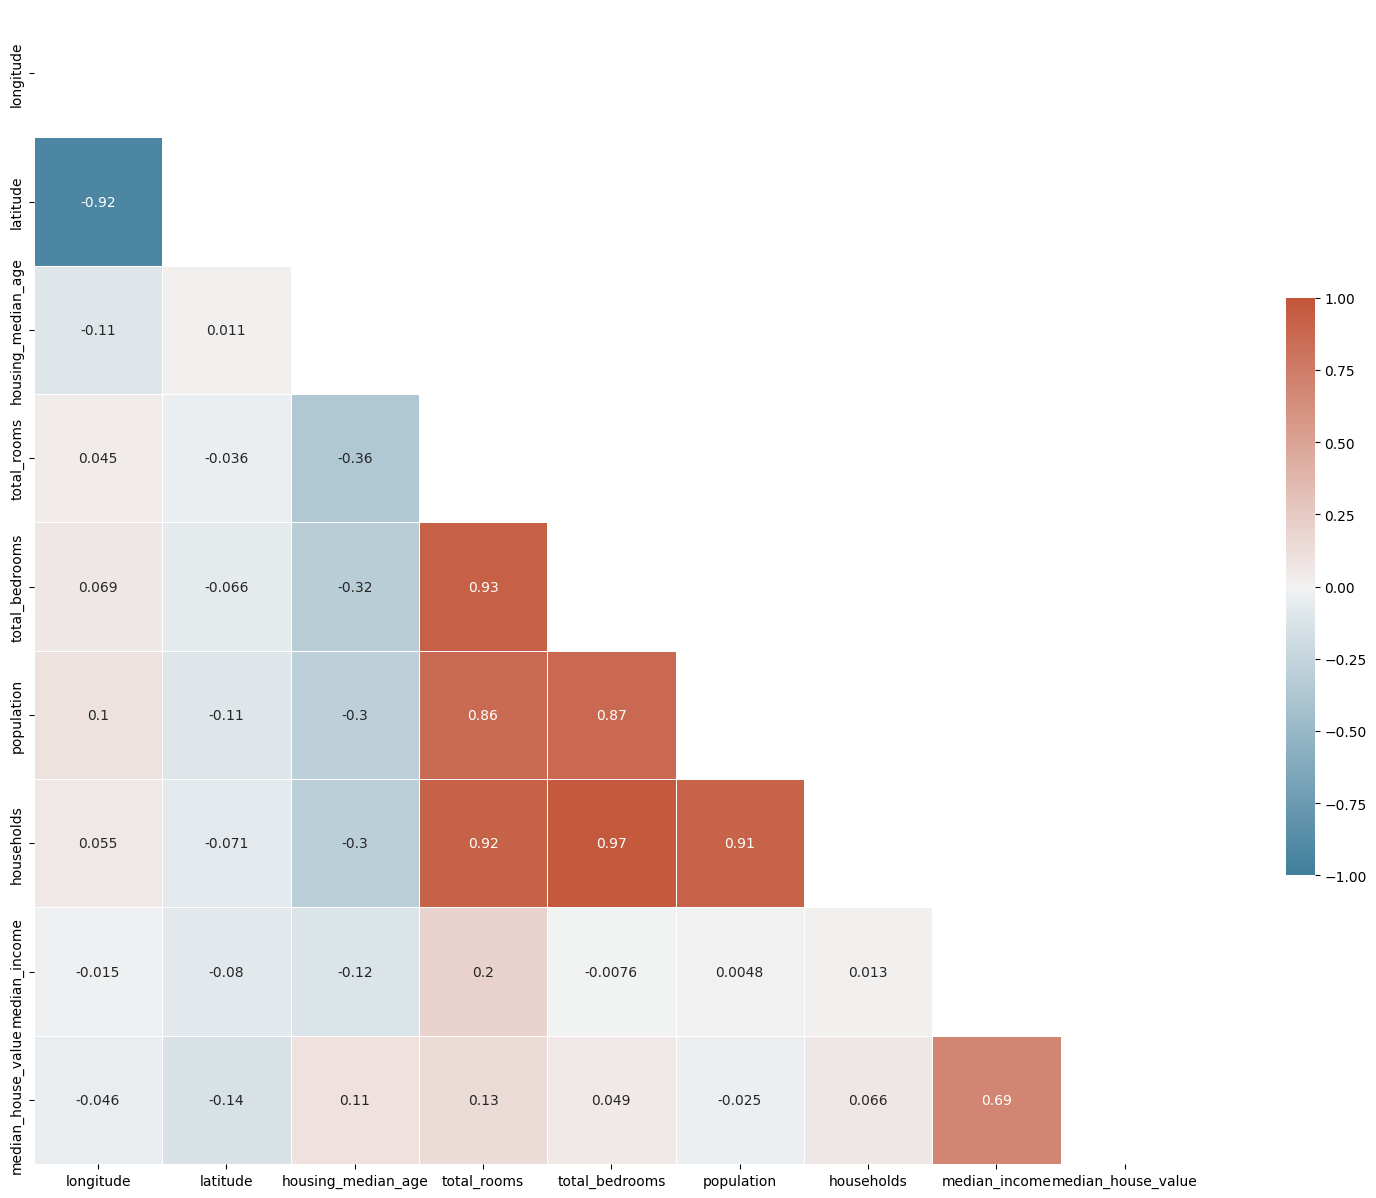

In [ ]:
matrix_2  = housing_tr.corr()
mask = np.triu(np.ones_like(matrix_2, dtype=bool))

f, ax = plt.subplots(figsize=(25, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(matrix_2, mask=mask, cmap=cmap, center=0, annot=True,vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



[Link to dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

**b)** Create visualization for regression models.

**c)** Compare the training error and the test error for each model.

**d)** Describe the bias-variance trade-off in the context of this exercise.

**a)** Build polynomial regression models for the California housing dataset with five different polynomial degrees (n).

In [ ]:
X = housing_tr.drop(columns = ['median_house_value'])
Y = housing_tr[['median_house_value']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2, random_state = 41)

In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(x_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_train_predicted = lin_reg.predict(X_poly)

In [ ]:
y_test_predicted = lin_reg.predict(poly_features.fit_transform(x_test))

<ipython-input-66-7684c569bbe9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_residual, bins=15)
<ipython-input-66-7684c569bbe9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_residual, bins=15)


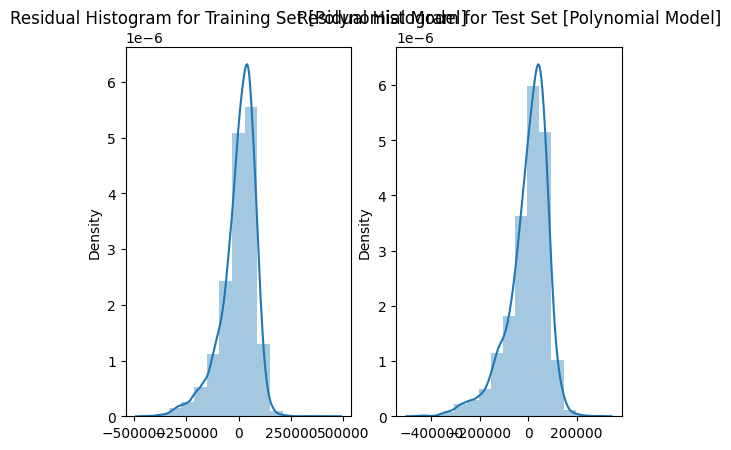

In [ ]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

# -

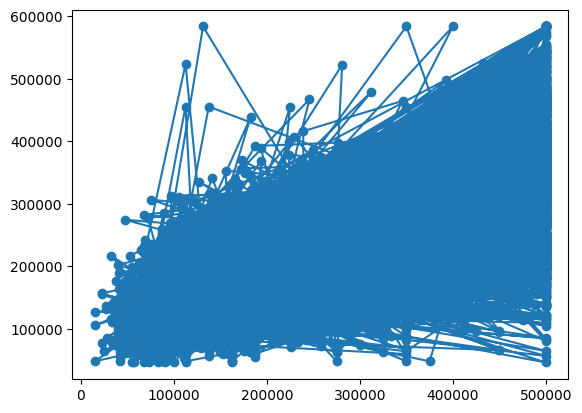

In [ ]:
#sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
plt.scatter(y_train, y_train_predicted)
plt.plot(y_train, y_train_predicted)
plt.show()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([21995860.79061154]),
 array([[ 6.42213028e+05,  9.56956515e+05, -7.97401225e+04,
          9.24229602e+02, -3.35500393e+03,  5.90744704e+02,
         -3.34704707e+03, -9.20751686e+05,  4.39455215e+03,
          1.19117819e+04, -9.59068525e+02,  1.18384302e+01,
         -4.43961692e+01,  8.76896536e+00, -4.41331186e+01,
         -1.18231721e+04,  6.80295717e+03, -1.01025977e+03,
          1.25819771e+01, -4.85532146e+01,  1.30218220e+01,
         -5.60896502e+01, -1.23418750e+04,  1.99097201e+01,
         -1.90317468e-01,  5.80724668e-01, -1.50743096e+00,
          5.75398966e+00,  9.70066106e+01, -4.94940417e-04,
         -5.88272695e-03, -8.43364383e-03,  4.17221353e-02,
          7.10117984e+00,  1.70829525e-02,  3.39353967e-02,
         -1.58221036e-01, -1.86139382e+01,  2.93200125e-03,
         -9.07272824e-03, -5.27897738e+00,  2.26759366e-05,
          2.86368918e+00, -2.04491713e+03]]))

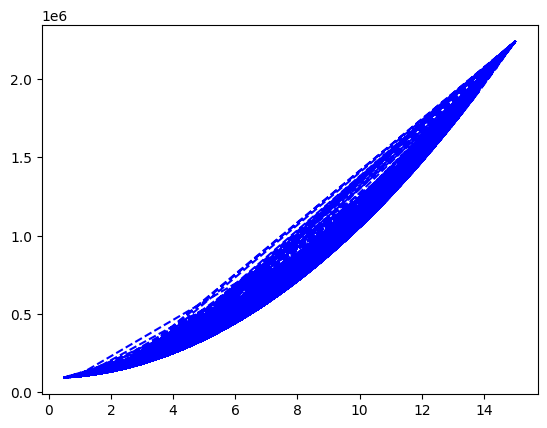

In [ ]:
y = 90333.84891393 + (2326.03090666*X) + (9401.37133693 * X**2)
plt.plot(X,y,'--', color = 'blue')
#plt.scatter(X, Y, color = 'red')
#plt.plot(X_test, y_pred, color = 'red')
#plt.xlabel('Income')
#plt.ylabel('Life expectancy')

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

MAE: 108285.10198047645
RMSE:  140824.95696882452
R2:  -0.5078145020163793


## EXTRA: Task 3


Build a classification model for the "Iris dataset" and evaluate the model.

[Link to dataset](https://www.kaggle.com/datasets/uciml/iris).